In [1]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(X_train[0])
print(len(X_train[0]))
print(X_train.shape, y_train.shape)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
(25000,) (25000,)


리뷰 최대 길이 : 2494
리뷰 평균 길이: 238.71364


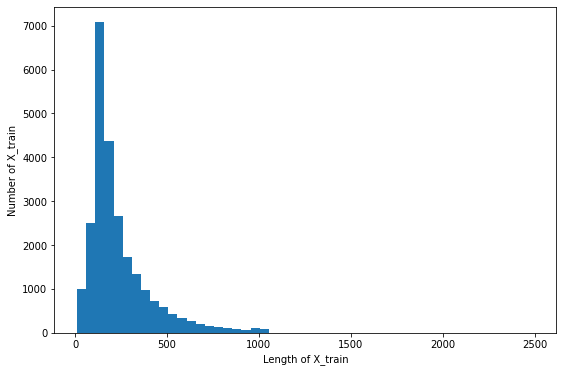

In [3]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 :', max(len(L) for L in X_train))
print('리뷰 평균 길이:', sum(map(len, X_train))/len(X_train))

plt.figure(figsize=(9,6))
plt.hist([len(L) for L in X_train], bins=50)
plt.xlabel('Length of X_train')
plt.ylabel('Number of X_train')
plt.show()

In [4]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts=True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))
print(unique_elements)

Label 빈도수:
[[    0     1]
 [12500 12500]]
[0 1]


In [5]:
from keras import preprocessing

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=10000)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=10000)

X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

In [6]:
print(X_train[0])
print(len(X_train[0]))

[  0   0   0 ...  19 178  32]
10000


In [7]:
y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

print(y_train[:21])
print(y_test[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


In [8]:
from keras import models
from keras import layers

imdb = models.Sequential()
imdb.add(layers.Embedding(10000, 32, input_length=10000))
imdb.add(layers.LSTM(8))
imdb.add(layers.Dropout(0.5))
imdb.add(layers.Dense(1, activation='sigmoid'))

imdb.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 32)         320000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 321,321
Trainable params: 321,321
Non-trainable params: 0
_________________________________________________________________


In [9]:
imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
%%time
Hist = imdb.fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/25
49/49 [==============================] - 82s 1s/step - loss: 0.6916 - accuracy: 0.5517 - val_loss: 0.6824 - val_accuracy: 0.6578
Epoch 2/25
49/49 [==============================] - 51s 1s/step - loss: 0.6650 - accuracy: 0.6915 - val_loss: 0.5318 - val_accuracy: 0.7940
Epoch 3/25
49/49 [==============================] - 51s 1s/step - loss: 0.5043 - accuracy: 0.8228 - val_loss: 0.4466 - val_accuracy: 0.8398
Epoch 4/25
49/49 [==============================] - 52s 1s/step - loss: 0.4162 - accuracy: 0.8711 - val_loss: 0.4119 - val_accuracy: 0.8322
Epoch 5/25
49/49 [==============================] - 53s 1s/step - loss: 0.3809 - accuracy: 0.8746 - val_loss: 0.3863 - val_accuracy: 0.8541
Epoch 6/25
49/49 [==============================] - 52s 1s/step - loss: 0.3293 - accuracy: 0.8974 - val_loss: 0.3589 - val_accuracy: 0.8590
Epoch 7/25
49/49 [==============================] - 52s 1s/step - loss: 0.2911 - accuracy: 0.9165 - val_loss: 0.3503 - val_accuracy: 0.8585
Epoch 8/25
49/49 [==

782/782 [==============================] - 133s 170ms/step - loss: 0.5061 - accuracy: 0.8544
Loss = 0.50607
Accuracy = 0.85436


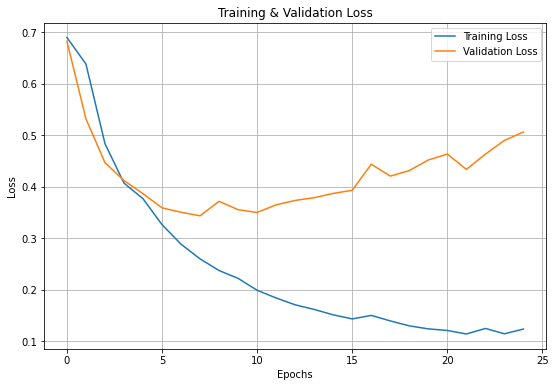

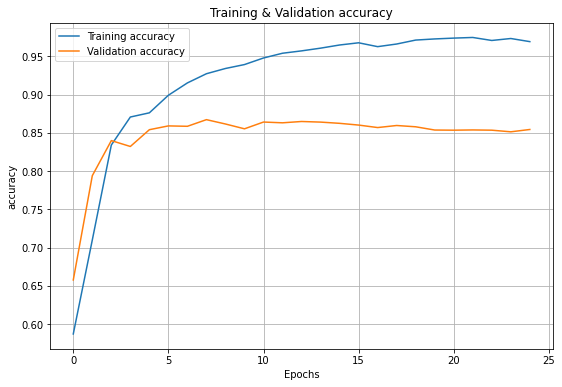

In [13]:
loss, accuracy = imdb.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

import matplotlib.pyplot as plt


plt.figure(figsize = (9, 6))
plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9, 6))
plt.plot(Hist.history['accuracy'])
plt.plot(Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

In [14]:
from keras import models
from keras import layers

imdb_1 = models.Sequential()
imdb_1.add(layers.Embedding(10000, 32, input_length=10000))
imdb_1.add(layers.Flatten())
imdb_1.add(layers.LSTM(8))
imdb_1.add(layers.Dropout(0.5))
imdb_1.add(layers.Dense(1, activation='sigmoid'))

imdb_1.summary()
imdb_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ValueError: ignored